In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [22]:
data = pd.read_csv("NYC_Data.csv")

In [23]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


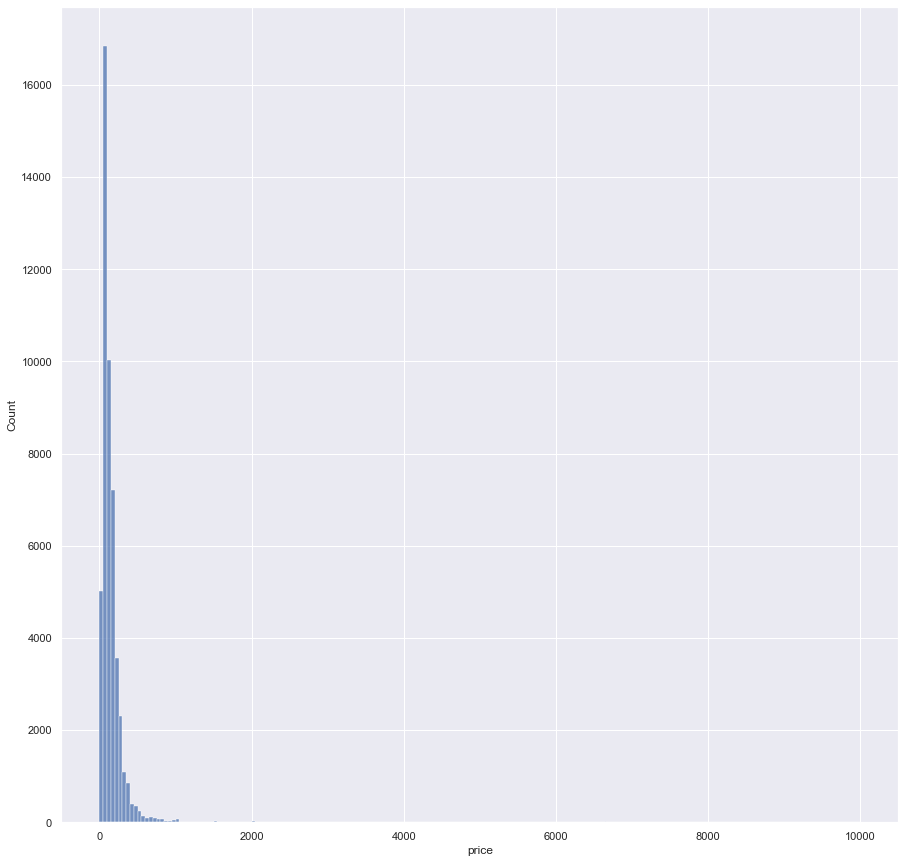

In [24]:
## Checking the tail of target variable "price"

sns.histplot(data['price'], bins=200)
sns.set(rc = {'figure.figsize':(15,15)})

In [25]:
base = ['latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']

In [26]:
Features = data[base]

In [27]:
Features.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


### Question 1

##### Find a feature with missing values. How many missing values does it have?

In [28]:
for f in Features:
    if Features[f].isna().sum() != 0:
        print(f, ":", Features[f].isna().sum())

reviews_per_month : 10052


### Question 2

##### What's the median (50% percentile) for variable 'minimum_nights'?

In [29]:
Features['minimum_nights'].median()

3.0

### Split the data

##### Shuffle the initial dataset, use seed 42.
##### Split your data in train/val/test sets, with 60%/20%/20% distribution.
##### Make sure that the target value ('price') is not in your dataframe.
##### Apply the log transformation to the price variable using the np.log1p() function.

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


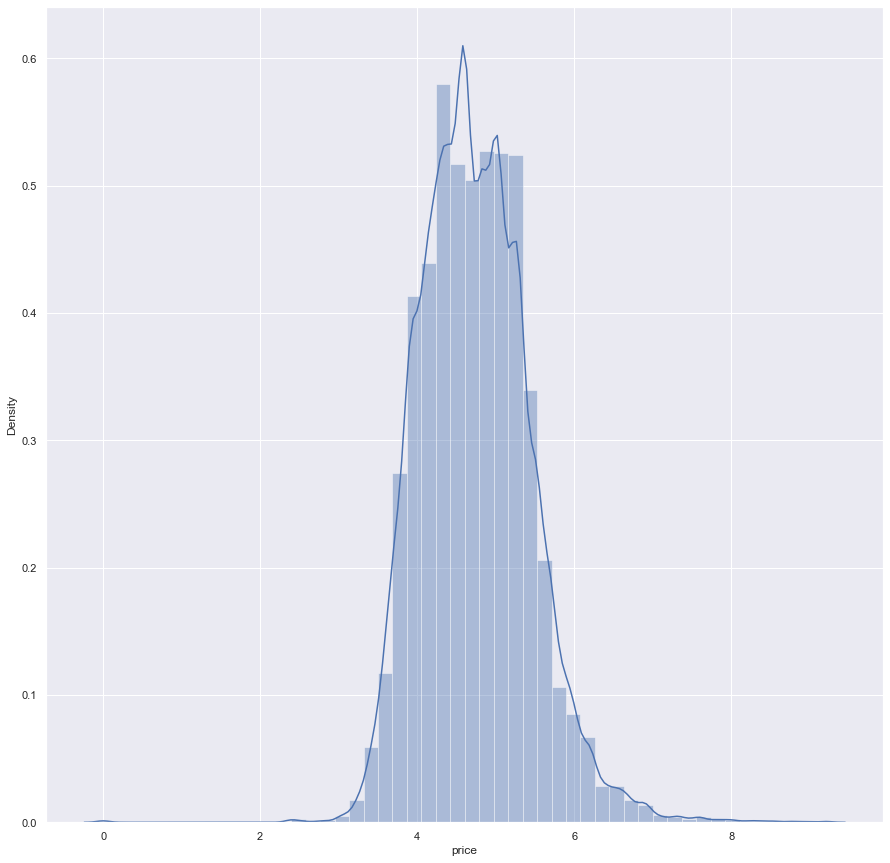

In [30]:
sns.distplot(np.log1p(data.price))

In [31]:
n = len(Features)

val_data = int(0.2 * n)
test_data = int(0.2 * n)
train_data = int(n - (val_data+test_data))

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

data_shuffled = Features.iloc[idx]

In [32]:
data_train = Features.iloc[:train_data]
data_val = Features.iloc[train_data:train_data+val_data]
data_test = Features.iloc[train_data+val_data:]

data_train = data_train.reset_index(drop=True)
data_val = data_val.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

In [33]:
y_train_orig = data_train.price.values
y_val_orig = data_val.price.values
y_test_orig = data_test.price.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

In [34]:
del data_train['price']
del data_val['price']
del data_test['price']

In [35]:
data_train.shape

(29337, 7)

In [36]:
data_val.shape

(9779, 7)

In [37]:
data_test.shape

(9779, 7)

### Question 3
##### We need to deal with missing values for the column from Q1.
##### We have two options: fill it with 0 or with the mean of this variable.
##### Try both options. For each, train a linear regression model without regularization using the code from the lessons.
##### For computing the mean, use the training only!
##### Use the validation dataset to evaluate the models and compare the RMSE of each option.
##### Round the RMSE scores to 2 decimal digits using round(score, 2)
##### Which option gives better RMSE?

In [38]:
## Filling the missing value with zero(0)

Features['reviews_per_month'] = Features['reviews_per_month'].fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:

base = ['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

def prepare_dataFrame(Features,fillna_value):
    #Features[base].fillna(fillna_value)
    Features_num = Features[base]
    Features_num = Features_num.fillna(fillna_value)
    X = Features_num.values
    return X

In [44]:
## Linear Regression Model
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [45]:
## Filling NA with Mean value

mean = Features.reviews_per_month.mean()

X_mean_train = prepare_dataFrame(data_train, fillna_value=mean)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)

In [46]:
X_mean_val = prepare_dataFrame(data_val, fillna_value=mean)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)

In [48]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [49]:
np.round(rmse(y_val, y_mean_pred_val),2)

0.67

In [51]:
## Filling NA with 0

X_null_train = prepare_dataFrame(data_train, fillna_value=0)
w_0_null, w_null = train_linear_regression(X_null_train, y_train)

In [53]:

X_null_val = prepare_dataFrame(data_val, fillna_value=0)
y_null_pred_val = w_0_null + X_null_val.dot(w_null)

In [54]:
np.round(rmse(y_val, y_null_pred_val),2)


0.66

Results for both the approaches of filling NA values by mean and 0 are the same for model

### Question 4
##### Now let's train a regularized linear regression.
##### For this question, fill the NAs with 0.
##### Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
##### Use RMSE to evaluate the model on the validation dataset.
##### Round the RMSE scores to 2 decimal digits.
##### Which r gives the best RMSE?

In [55]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [56]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_null_train, y_train, r=r)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    print(r, w_0, rmse_val)

0 -445.9773257715935 0.66
1e-06 -445.9136717031682 0.66
0.0001 -439.7006011326497 0.66
0.001 -390.2667267126862 0.66
0.01 -183.71808987557836 0.67
0.1 -29.194768289325754 0.69
1 -3.1004460967520204 0.69
5 -0.6219981025016796 0.69
10 -0.3103038611467961 0.69


In [60]:
rmse_list = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    idx = np.arange(n)
    np.random.seed(r)
    np.random.shuffle(idx)

    df_shuffled = data.iloc[idx]
    
    df_train = df_shuffled.iloc[:train_data].copy()
    df_val = df_shuffled.iloc[train_data:train_data+val_data].copy()
    df_test = df_shuffled.iloc[train_data+val_data:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train_orig = df_train.price.values
    y_val_orig = df_val.price.values
    y_test_orig = df_test.price.values

    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)
    
    del df_train['price']
    del df_val['price']
    del df_test['price']
    
    X_null_train = prepare_dataFrame(df_train, fillna_value=0)
    w_0, w = train_linear_regression(X_null_train, y_train)
    
    X_null_val = prepare_dataFrame(df_val, fillna_value=0)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    
    rmse_list.append(rmse_val)
    
    print(r, w_0, rmse_val)

0 -427.6284466670309 0.65
1 -414.7055496010243 0.65
2 -423.2541339553298 0.65
3 -421.893315004707 0.64
4 -422.06099022404106 0.64
5 -429.17875238444327 0.63
6 -427.4918956967628 0.63
7 -428.18847016910405 0.65
8 -427.6929103965057 0.65
9 -426.98269037520964 0.64


In [61]:
rmse_list

[0.65, 0.65, 0.65, 0.64, 0.64, 0.63, 0.63, 0.65, 0.65, 0.64]

In [62]:
np.round(np.std(rmse_list),3)

0.008

### SEED AND REGULARIZATION

In [65]:
r = 9

idx = np.arange(n)
np.random.seed(r)
np.random.shuffle(idx)

df_shuffled = data.iloc[idx]
    
df_train = df_shuffled.iloc[:train_data].copy()
df_val = df_shuffled.iloc[train_data:train_data+val_data].copy()
df_test = df_shuffled.iloc[train_data+val_data:].copy()

frames = [df_train, df_val]
df_train_val = pd.concat(frames)

df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_val_orig = df_train_val.price.values
y_test_orig = df_test.price.values

y_train_val = np.log1p(y_train_val_orig)
y_test = np.log1p(y_test_orig)

del df_train_val['price']
del df_test['price']

In [67]:
X_null_train_val = prepare_dataFrame(df_train_val, fillna_value=0)
w_0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_train_val, r=0.001)

X_null_test = prepare_dataFrame(df_test, fillna_value=0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)

np.round(rmse(y_test, y_null_pred_test),2)

0.65